In [1]:
from SeismTool.HSR import hsr
from imp import reload
from obspy import UTCDateTime,read
from SeismTool.io import seism,dataLib
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
stations =  seism.StationList('hsrStd')
#stations =  seism.StationList(seism.StationList('../stations/XA.Loc.201908.txt1'))
stations.set('net','XA')
stations.set('compBase','BH')
stations.set('nameMode','RDDS')
T0=1.567141351420457602e+09
T3L = [seism.Trace3(seism.getTrace3ByFileName(station.\
    getFileNames(int(T0/86400)*86400),freq=[0.5, 40],delta0=0.01)) for station in stations[::3]]
h=hsr.hsr()
eL=h.getCatolog(T3L[1:])


#####not too many noise std : 1549.317838#####
#####not too many noise std : 1339.262220#####
#####not too many noise std : 1139.771159#####
#####not too many noise std : 3122.364968#####
#####not too many noise std : 2138.500625#####
#####not too many noise std : 1481.653187#####
#####not too many noise std : 2683.119580#####
#####not too many noise std : 2544.674768#####
#####not too many noise std : 1721.629446#####
#####not too many noise std : 3222.273728#####
#####not too many noise std : 3931.140220#####
#####not too many noise std : 1548.505164#####
#####not too many noise std : 7706.332055#####
#####not too many noise std : 5572.831358#####
#####not too many noise std : 6831.512457#####
#####not too many noise std : 2282.040053#####
#####not too many noise std : 2158.413531#####
#####not too many noise std : 1870.196681#####
23.75 209 207


2019-08-30T08:11:35.987248Z


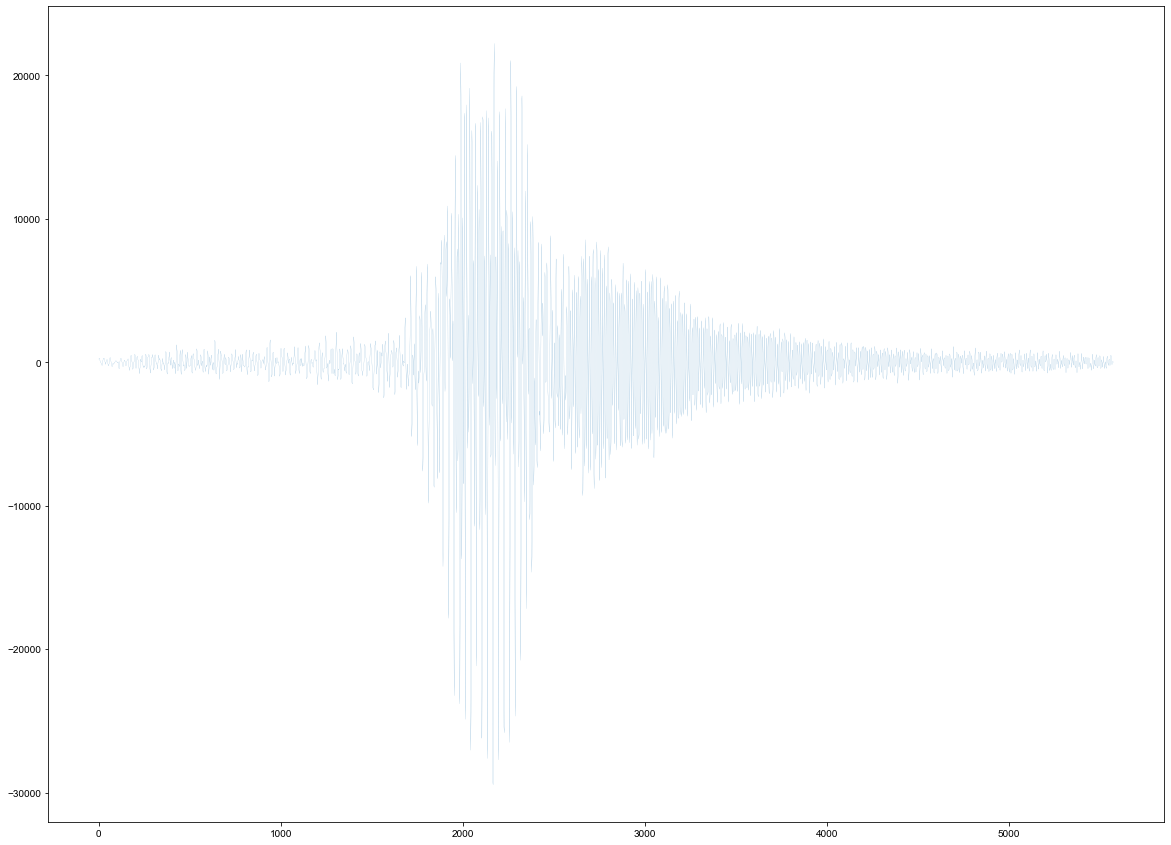

In [25]:
dTime=30
bTime=-20
time0,time1,v0,v1=eL[1]
#time0,time1,v0,v1=eL[10]
print(UTCDateTime(time0)+8*3600)
time0,time1=[min([time0,time1]),max([time0,time1])]
f= [0.1,11]
order =4
t3 =T3L[-3].slice(time0+bTime,time1+dTime)
t3.rotate(25)
v = h.findFF(t3)*25
t3.filt(f,order)
plt.figure(figsize=[20,15])
plt.plot(t3.Data()[:,0],linewidth=0.1)
plt.show()

82.1887322844


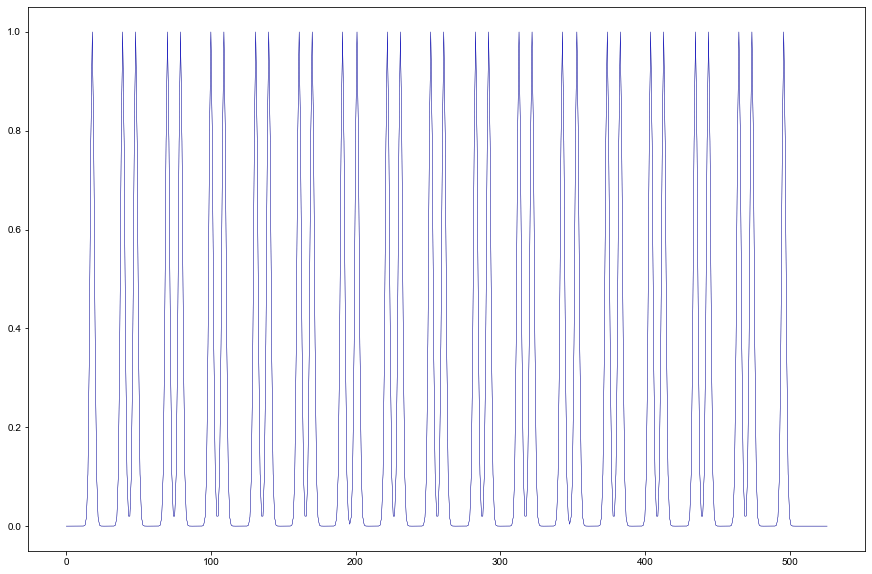

In [26]:
from SeismTool.mathTool import mathFunc
delta = t3.Delta()
h=hsr.hsr()
print(v)
#v=82.27
reload(mathFunc)
#dL = np.arange(16)*25
src0=mathFunc.genSrc(v=v,dt=0.1,model='380AL',diffOrder=0,f=f)
b,a=signal.butter(4,f,btype='bandpass',fs=int(1/delta))
#src1=signal.filtfilt(b,a,src0)
src = src0
#src=signal.filtfilt(b,a,src0)
plt.figure(figsize=[15,10])
plt.plot(src0,'k',linewidth=0.3)
plt.plot(src,'b',linewidth=0.3)
#plt.plot(src,'r',linewidth=0.3)
plt.show()


0.0786268862212


(-0.11273161359131337, 0.08732901550829411)

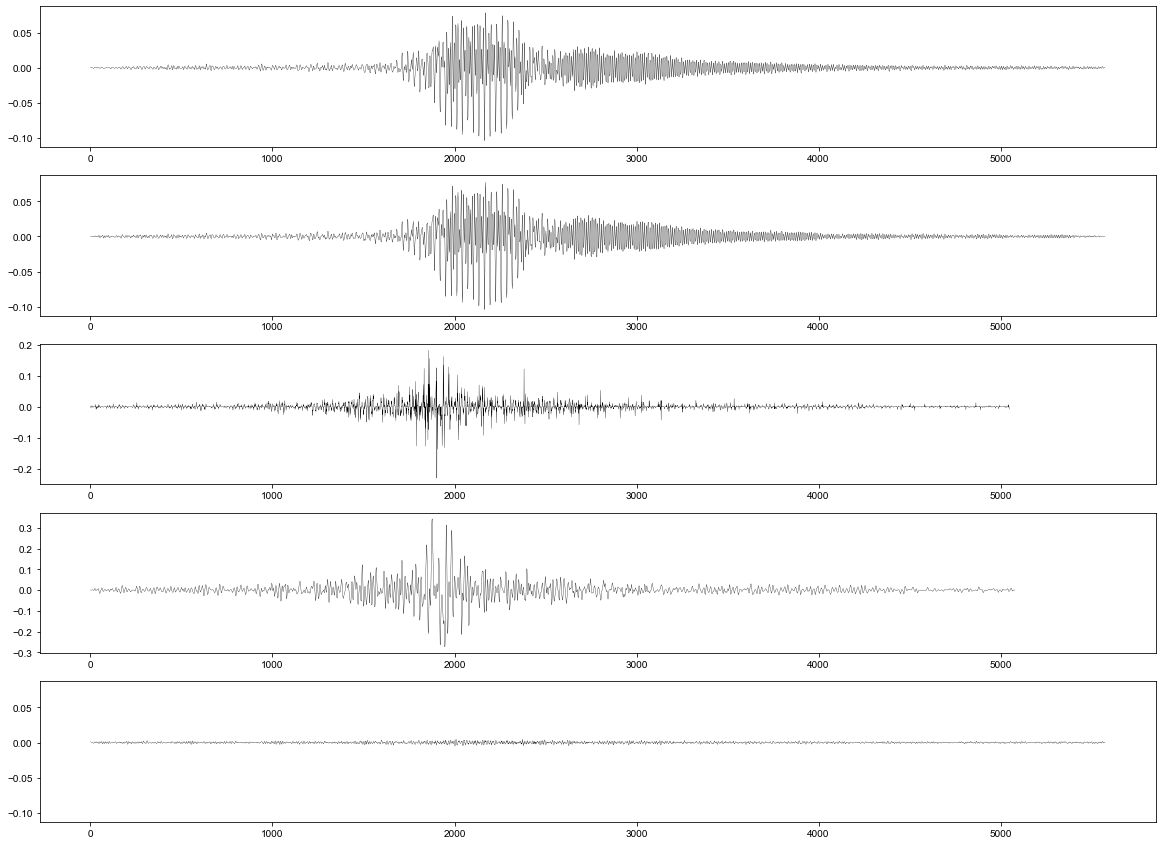

In [28]:
reload(mathFunc)
wave = t3.Data()[:,0]
resp0,wave0,waveNew,std=mathFunc.deConv(wave,src,Round=20000)
print(std)
plt.figure(figsize=[20,15])
plt.subplot(5,1,1)
plt.plot(wave0,'k',linewidth=0.3)
xlim=plt.xlim()
ylim=plt.ylim()
plt.subplot(5,1,2)
plt.plot(waveNew,'k',linewidth=0.3)
plt.xlim(xlim)
plt.ylim(ylim)
plt.subplot(5,1,3)
plt.plot(resp0,'k',linewidth=0.3)
plt.xlim(xlim)
resp=signal.filtfilt(b,a,resp0)
fMax = f[-1]
N = int(1/(2*fMax*delta))
#src = np.zeros(int(timeR/delta)+8*N-1)
timeL=np.arange(8*N)-4*N
g = np.exp(-(timeL/N)**2)
resp = signal.convolve(g,resp0)
plt.subplot(5,1,4)
plt.plot(resp,'k',linewidth=0.3)
plt.xlim(xlim)
plt.subplot(5,1,5)
plt.plot(wave0-waveNew,'k',linewidth=0.3)
plt.xlim(xlim)
plt.ylim(ylim)
#h.plotWS(resp,delta=0.01,isSpec=True)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


422


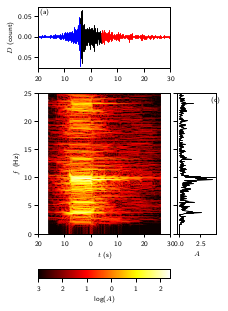

In [5]:
h.plotWS(resp,delta=0.01,isSpec=True,time0=-20,xlim=[-20,30],fMax=25)

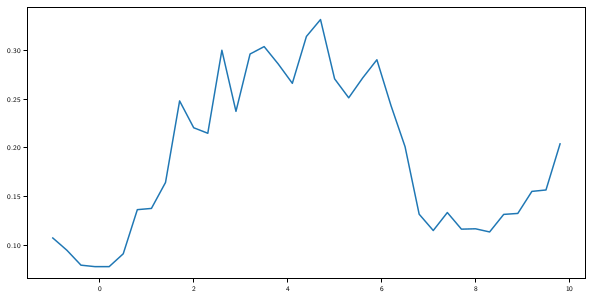

In [6]:
reload(mathFunc)
v = h.findFF(t3)*25
v = 82.5
dL0 = np.arange(16).astype(np.float64)*25
stdL=[]
ddL=np.arange(-1,10,0.3)
for dd in ddL:
    dL =dL0.copy()
    dL[-8:]+=dd
    src0=mathFunc.genSrc(v=v,dL=dL)
    b,a=signal.butter(4,f,btype='bandpass',fs=int(1/delta))
    src=signal.filtfilt(b,a,src0)
    resp0,wave0,waveNew,std=mathFunc.deConv(wave,src)
    stdL.append(std)

plt.figure(figsize=[10,5])
plt.plot(ddL,stdL)

#plt.xlim(xlim)


2019-08-30T00:11:15.990152Z
82.65


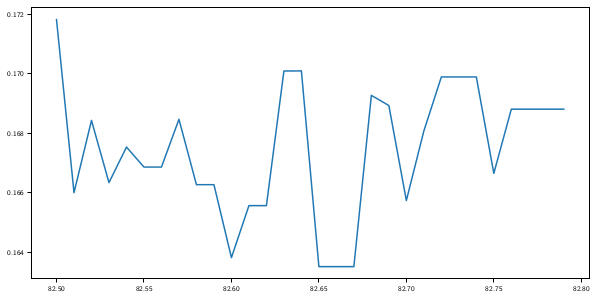

In [113]:
reload(mathFunc)
from obspy import UTCDateTime
print(UTCDateTime(t3.bTime))
v = h.findFF(t3)*25
stdL=[]
vL=np.arange(82.5,82.8,0.01)
for v in vL:
    #dL[-8:]+=dd
    src0=mathFunc.genSrc(v=v,model='380AL',diffOrder=0,f=[])
    b,a=signal.butter(4,f,btype='bandpass',fs=int(1/delta))
    #src=signal.filtfilt(b,a,src0)
    #src  =signal.filtfilt(b,a,src)
    src = src0
    resp0,wave0,waveNew,std=mathFunc.deConv(wave,src)
    stdL.append(std)

plt.figure(figsize=[10,5])
plt.plot(vL,stdL)
print(vL[np.array(stdL).argmin()])